# Visualization in Python: matplotlib and pandas

## Intro to matplotlib

pandas uses matplotlib to make plotting data sets easy.  You can also use features of matplotlib directly when plotting.

### Parts of a matplotlib plot

![matplotlib plot](plotparts.png)

![another plot breakdown](anatomy1.png)

matplotlib.org

* http://matplotlib.org/users/beginner.html
* http://matplotlib.org/api/pyplot_summary.html
* http://matplotlib.org/gallery.html 

Import libraries, tell the notebook to show matplotlib plots inline and make them interactive (use `%matplotlib inline` to just have them inline, but not interactive)

In [2]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import datetime as dt
import matplotlib.dates as dates

Read in earthquakes data (there's a bunch of extra info at the start of the file, so skip that) and look at the first observations

`
FORMAT DESCRIPTION:
DATE......... Year, Month, Day
TIME......... Hour, Minute, Second
LAT/LON...... Location
DEP.......... Depth [km]
EH1/EH2/AZ... Horizontal major/minor axis [km] and azimuth of the 95% 
              relative location error ellipses. (-1 if not available).
EV........... Vertical relative location error [km] at the 95%
              confidence level. (-1 if not available).
MAG.......... Magnitude, ML, as listed in the NCSN catalog. 
ID........... CUSP event ID.
`

In [42]:
df = pd.read_csv("earthquakes.txt", delim_whitespace=True, skiprows=79, na_values=[-1],
                 names=["YEAR", "MONTH", "DAY", "HOUR", "MINUTE", "SECOND",
                        "LAT", "LON", "DEP", "EH1", "EH2", "AZ", "EZ", "MAG", "ID"])
df.head(10)

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,LAT,LON,DEP,EH1,EH2,AZ,EZ,MAG,ID
0,1984,1,1,1,19,11.317,36.08781,-120.22869,10.897,0.020,0.010,96.0,0.022,1.8,1109386
1,1984,1,1,1,58,2.420,36.87608,-120.90669,2.661,0.071,0.018,55.0,0.421,0.0,346
2,1984,1,1,1,59,27.124,36.87000,-120.90889,1.592,0.110,0.016,66.0,0.727,1.5,1109389
3,1984,1,1,2,28,4.240,37.51546,-118.75485,7.703,0.020,0.008,37.0,0.024,1.2,1109391
4,1984,1,1,3,8,58.044,40.57227,-124.55933,20.407,1.009,0.083,103.0,0.080,2.0,1109392
5,1984,1,1,3,15,36.690,37.56065,-118.84449,10.404,0.033,0.016,38.0,0.039,1.1,1109393
6,1984,1,1,4,46,38.708,38.80774,-122.84761,1.824,0.009,0.005,175.0,0.011,1.1,1109395
7,1984,1,1,5,1,53.594,36.24686,-120.39385,6.836,0.059,0.016,106.0,0.040,1.4,357
8,1984,1,1,7,8,31.986,36.49920,-121.07855,13.020,0.042,0.020,100.0,0.102,1.4,1109397
9,1984,1,1,7,17,21.373,37.54467,-118.86678,7.245,0.042,0.015,74.0,0.043,0.7,363


Let's plot magnitude vs. depth, using only the first 50 obs.  See what different options do.

Start with basic "plot".  `plt` is the shorthand we set above when we imported `matplotlib.pyplot`.

<IPython.core.display.Javascript object>


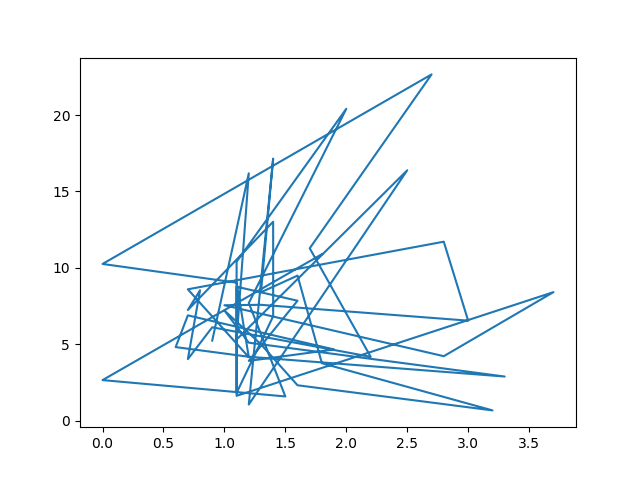

In [47]:
plt.plot(df['MAG'][:50], df['DEP'][:50])

That's not what we want -- get a scatter plot instead.

First we need to close the first plot, or the new commands will be added to the existing plot

<IPython.core.display.Javascript object>


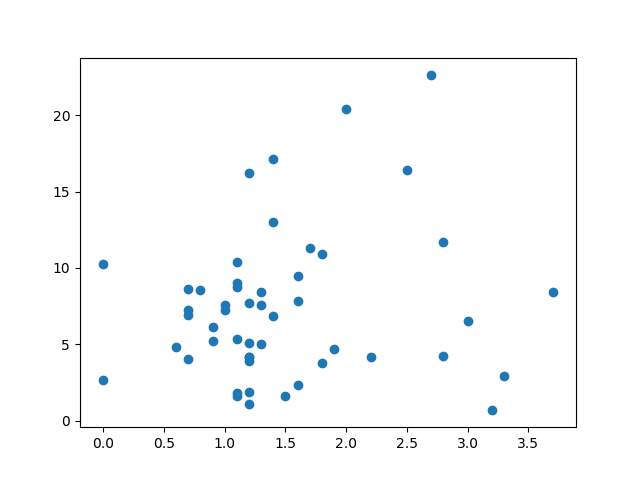

In [46]:
plt.close()
plt.scatter(df['MAG'][:50], df['DEP'][:50])

That's better.  Now change the plot marker:

<IPython.core.display.Javascript object>


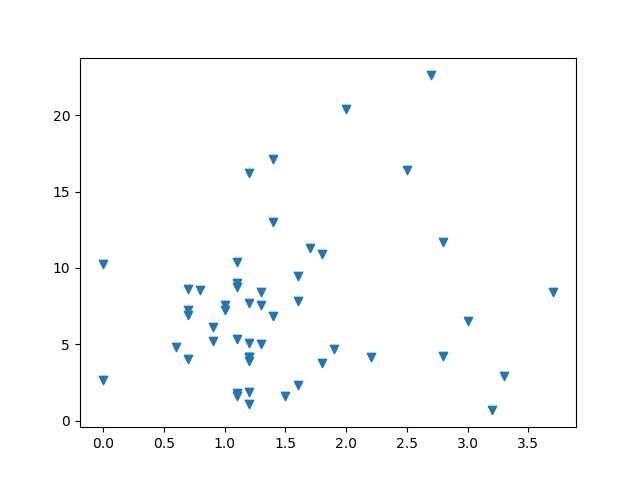

In [48]:
plt.close()
plt.scatter(df['MAG'][:50], df['DEP'][:50], marker="v")

And the marker size

<IPython.core.display.Javascript object>


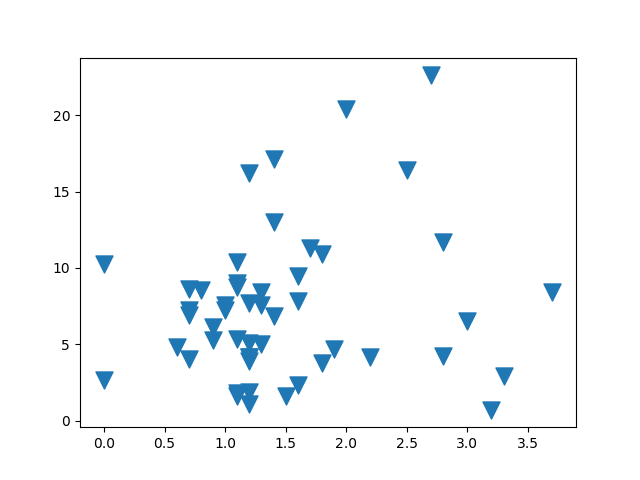

In [49]:
plt.close()
plt.scatter(df['MAG'][:50], df['DEP'][:50], marker="v", s=150)

Now make each marker size a function of the magnitude (not a great idea from a visualization perspective...)

<IPython.core.display.Javascript object>


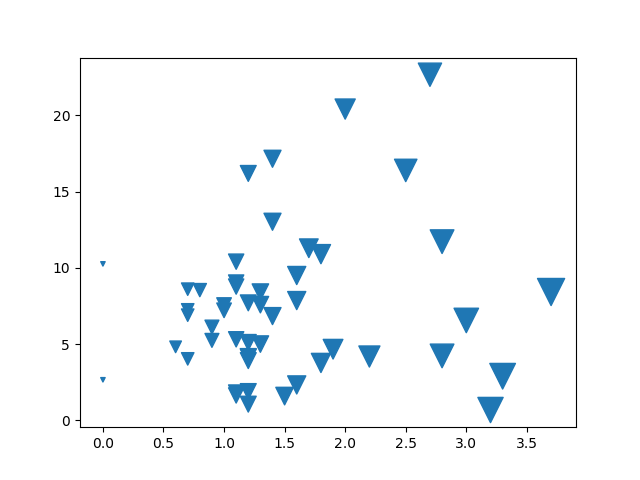

In [26]:
plt.close()
plt.scatter(df['MAG'][:50], df['DEP'][:50], marker="v", s=[10+100*df['MAG'][:50]])

Make a subset of the data with only earthquakes of magnitude 5 or more

In [27]:
bigones = df[df['MAG'] >= 5]

Color markers by year of earthquake, add axis labels

<IPython.core.display.Javascript object>


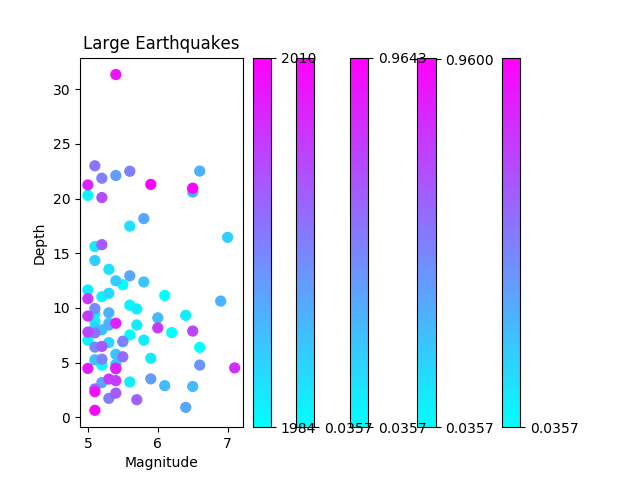

In [78]:
plt.close()
# we'll save the output from the plot call so we can use the data later for a legend
pts = plt.scatter(bigones['MAG'], bigones['DEP'], # data
            s=50, # marker size
            cmap="cool", # color scheme: https://matplotlib.org/users/colormaps.html
            c=1.0*(bigones['YEAR']-1983)/28) # specific color for each point (range between 0 and 1)
plt.ylabel("Depth")
plt.xlabel("Magnitude")
plt.title("Large Earthquakes")

Add a legend to the above plot; the `colorbar` function takes the `pts` data we got back when we made the plot above.

In [84]:
clrbar = plt.colorbar(pts, ticks=[1.0/28, 27.0/28]) # data takes values from 1983=1/28, 2010=27/28
clrbar.ax.set_yticklabels(['1984', '2010'])

[<matplotlib.text.Text at 0x11fc15eb8>, <matplotlib.text.Text at 0x11fc46240>]

Make a proper date column in the data so that we can plot by date.  Setting it as an index lets us group by month.

In [51]:
df['datetime'] = pd.to_datetime(df[df.columns[range(6)]]) ## first 6 columns are year, month, day, hour, min, sec
df = df.set_index("datetime")

Plot number of earthquakes by month with a bar chart, limit to recent years

In [113]:
plt.close()
counts = df.groupby(pd.TimeGrouper(freq='M')).count()['ID'][-48:] # do the aggregation
counts.head()

datetime
2008-01-31    1844
2008-02-29    1881
2008-03-31    2115
2008-04-30    2730
2008-05-31    2034
Freq: M, Name: ID, dtype: int64

<IPython.core.display.Javascript object>


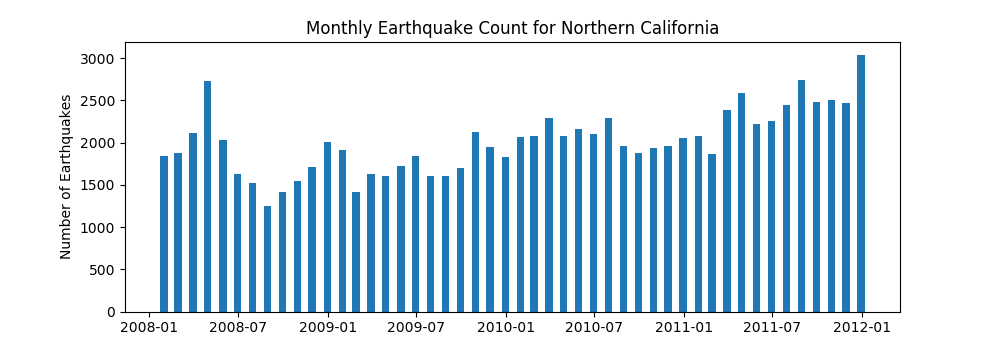

In [115]:
fig, ax = plt.subplots(figsize=(10, 3.5)) # specify a plot size, use subplots to get axes because we'll need it later
plt.bar(counts.index, counts, width=15) # if we don't set the bar width, some bars might not be visible with this many
ax.xaxis_date()
plt.title("Monthly Earthquake Count for Northern California")
plt.ylabel("Number of Earthquakes")

We could also plot the `counts` object directly:

<IPython.core.display.Javascript object>


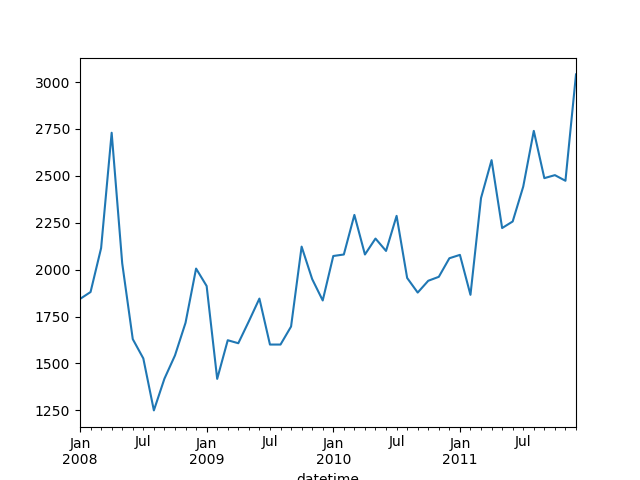

In [117]:
plt.close()
counts.plot()

Plot hourly earthquakes on a busy day

<IPython.core.display.Javascript object>


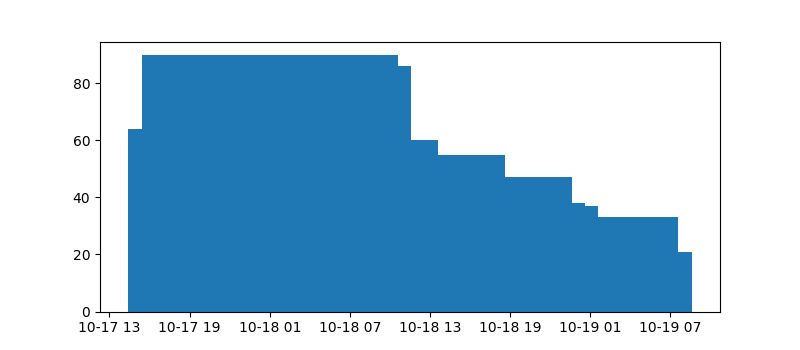

<Container object of 24 artists>

In [118]:
plt.close()
df['date'] = pd.to_datetime(df[df.columns[range(3)]])
counts_hourly = df[df['date'] == dt.datetime(1989, 10, 18).date()].resample('1H').count()['ID'] 
# ID above is just to choose a single column
plt.subplots(figsize=(8, 3.5))
plt.bar(counts_hourly.index, counts_hourly)

Hmm, that doesn't look too good.  Fix it.  While we're at it, change the color and bar alignment.  And format the times to be just the hour.

<IPython.core.display.Javascript object>


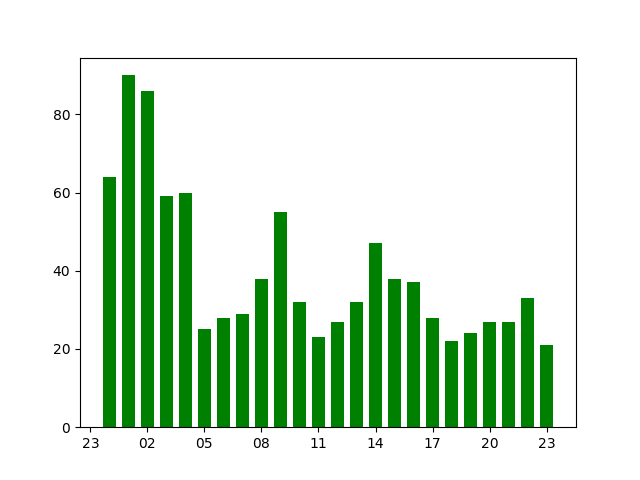

In [124]:
plt.close()
fig = plt.figure() # just a different way to do it
ax = fig.add_subplot(111) ## saying that there's only one main plot being added to this figure
plt.bar(counts_hourly.index, counts_hourly, width=.03, color='g', align='center')
ax.xaxis.set_major_formatter(dates.DateFormatter('%H'))
plt.show()

Looking better, but we can make it nicer

<IPython.core.display.Javascript object>


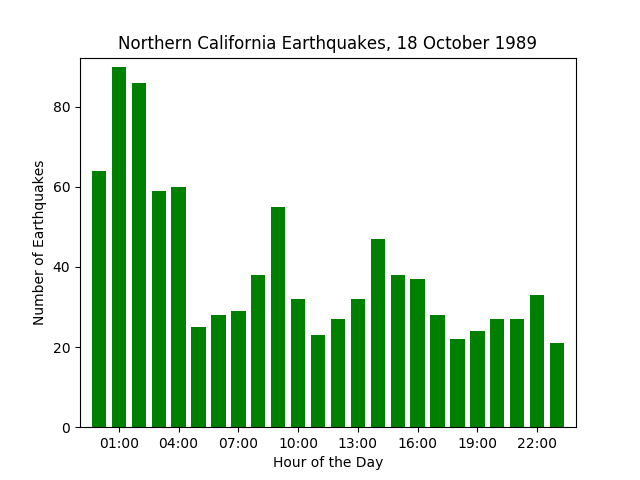

In [129]:
plt.close()
fig, ax = plt.subplots() ## in one line instead of two above, just to show this
plt.bar(counts_hourly.index, counts_hourly, width=.03, color='g', align='center')
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:00'))
#plt.ylim(0, 95) ## could modify ylim manually, but below works even if data changes
ax.margins(0.025) ## control extra space at beginning and end of x-axis
plt.title("Northern California Earthquakes, 18 October 1989")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Earthquakes")

Save our plot

In [130]:
plt.savefig("plot1.pdf")
plt.close()

More on markers and legends; generate some random values with `randn` and make a histogram.  Add the theoretical distirbution line above it

Info on named colors at https://matplotlib.org/examples/color/named_colors.html

<IPython.core.display.Javascript object>


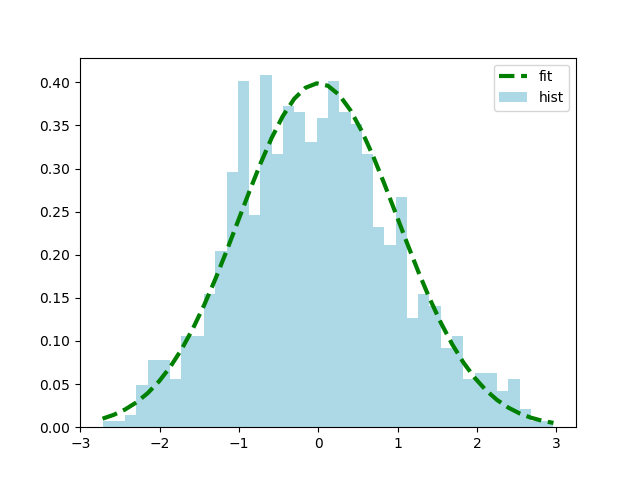

In [134]:
from pylab import *

# keep the values returned from calling the histogram plot to use with the legend and next plot
n, bins, patches = plt.hist(randn(1000), 40, normed=True, color="lightblue")

# add another plot on top of the histogram
# save the value here too so we can use it for the legend
l, = plt.plot(bins, normpdf(bins, 0.0, 1.0), 'g--', linewidth=3)
## comma above in l, means unpack the returned tuple to give you just the line object

legend([l, patches[0]], ['fit', 'hist'])

In [135]:
plt.close()

Annotation

<IPython.core.display.Javascript object>


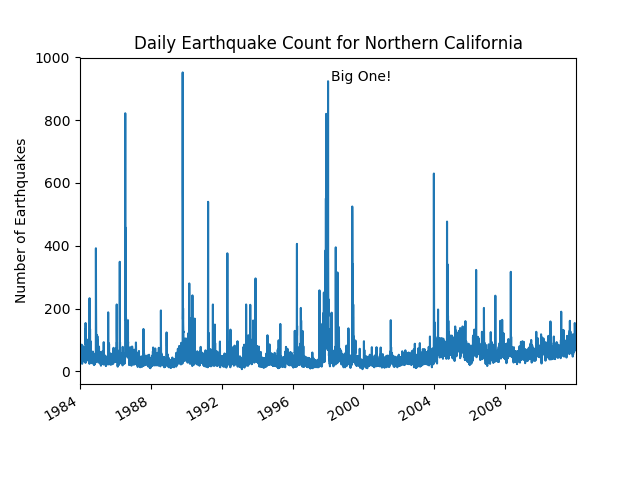

In [136]:
counts = df['date'].value_counts()
counts.plot() ## plot the Series directly
plt.title("Daily Earthquake Count for Northern California")
plt.ylabel("Number of Earthquakes")
plt.text(dt.datetime(1998,3,1), 925, "Big One!") # use date to position on x-axis

In [137]:
plt.close()

Or with an arrow

<IPython.core.display.Javascript object>


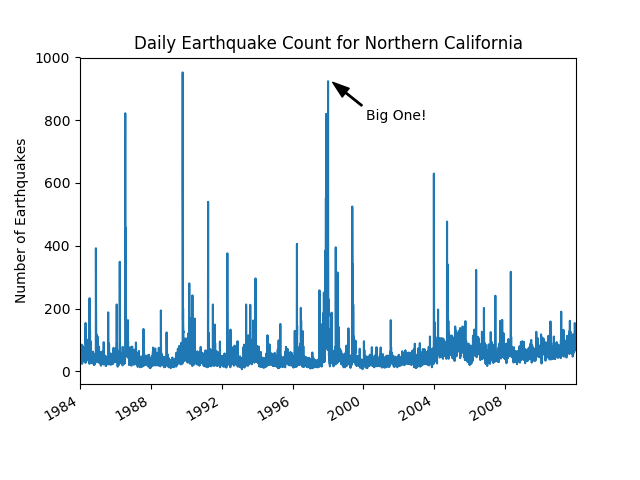

In [138]:
counts = df['date'].value_counts()
counts.plot() ## plot the Series directly
plt.title("Daily Earthquake Count for Northern California")
plt.ylabel("Number of Earthquakes")
plt.annotate("Big One!", xy=(dt.datetime(1998,3,1), 925),
             xytext=(dt.datetime(2000,3,1), 800),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1,
                             headwidth=8))

In [139]:
plt.close()

An example of plotting mathematical functions.

For math text, see https://matplotlib.org/users/mathtext.html

<IPython.core.display.Javascript object>


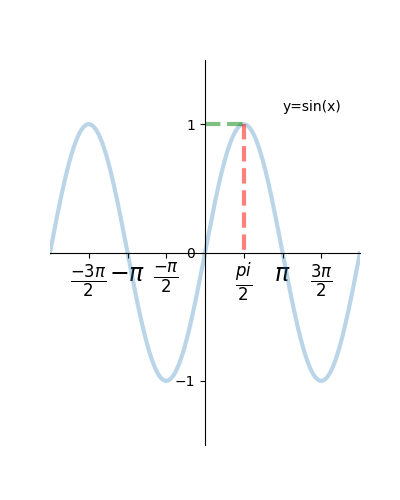

In [142]:
import numpy as np

# create empty plot
fig = plt.figure(figsize=(4, 5))
ax = fig.add_subplot(111)

# generate data
x = np.arange(-2*np.pi, 2*np.pi, 0.01)
y = np.sin(x)

# deal with bounding box 
# lose top and right
# move bottom and left to the center like a mathematical graph
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the sin wave
ax.plot(x, y,linewidth=3, alpha=0.3)

# plot the reference lines
ax.plot([0, np.pi/2], [1, 1], ls="--", color="green", linewidth=3,alpha=0.5)
ax.plot([np.pi/2, np.pi/2], [1, 0], ls="--", color="red", linewidth=3,alpha=0.5)

# axis limits
ax.set_xlim(-2*np.pi, 2*np.pi)
ax.set_ylim(-1.5, 1.5)

# axis labels
xticker = np.arange(-np.pi-np.pi/2, np.pi+np.pi, np.pi/2)
xlabels = [r"$\frac{-3\pi}{2}$", r"${-\pi}$",r"$\frac{-\pi}{2}$","",r"$\frac{pi}{2}$",r"${\pi}$",r"$\frac{3\pi}{2}$"]

ax.set_xticks(xticker)
ax.set_xticklabels(xlabels, size=17)

yticker = np.arange(-1, 2, 1)
ax.set_yticks(yticker)

# annotation
ax.text(np.pi, 1.1, "y=sin(x)")

In [143]:
plt.close()